This is a notebook that aims to implement several algorithms to predict the if a bank client is a good (0) or a bad (1) candidate for a bank credit, based on 20 attributes.

The notebook used for this and the rest of notebooks can be downloaded in the following link:

https://www.openml.org/d/42627

### Loading Libraries

In [1]:
#Data Manipulation and Data Wrangling
import pandas as pd

#Linear Algebra and statistics
import numpy as np
import scipy
import statistics

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
#Load the Data
df = pd.read_csv('../dataset_31_credit-g.csv')

In [3]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

The dataset not having null values allows us to worry just about making the values numeric.

In [5]:
#Custom function to prepare the dataset for the algorithms. It assumes that there are no NaN values and performs
# transformations column by column.
def category2num(data, column):
    
    
    values = list(df[column].unique())
    
    #Generate a dictionary that binds all the string values to integers
    conv_dict = {value: index for index, value in enumerate(list(data[column].unique()))}
    
    #Generate a dictionary that we will return in order to be able to check later the values
    dictionary = {value: index for index, value in enumerate(list(data[column].unique()))}
    dictionary  = {value: key for key, value in dictionary.items()}
    
    #for index, value in enumerate(valus):
        #conv_dict[value] = index
    
    #Iterate over the whole column performing the change from string to integer with the replace function
    for value in values:
        data[column] = data[column].replace(value, conv_dict[value])
    
    return(dictionary)

In [6]:
#Iterates over the list of column names and applies the category2num function
dict_of_dict = {}
for j, column in enumerate(list(df.columns)):
    if isinstance(df[column][j], str):
        dict_of_dict[column] = category2num(df, column)
        print("The", column, "column was converted from strings to integers")
    else:
        print("The", column, "column contains integers")

The checking_status column was converted from strings to integers
The duration column contains integers
The credit_history column was converted from strings to integers
The purpose column was converted from strings to integers
The credit_amount column contains integers
The savings_status column was converted from strings to integers
The employment column was converted from strings to integers
The installment_commitment column contains integers
The personal_status column was converted from strings to integers
The other_parties column was converted from strings to integers
The residence_since column contains integers
The property_magnitude column was converted from strings to integers
The age column contains integers
The other_payment_plans column was converted from strings to integers
The housing column was converted from strings to integers
The existing_credits column contains integers
The job column was converted from strings to integers
The num_dependents column contains integers
The

In [7]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0,6,0,0,1169,0,0,4,0,0,...,0,67,0,0,2,0,1,0,0,0
1,1,48,1,0,5951,1,1,2,1,0,...,0,22,0,0,1,0,1,1,0,1
2,2,12,0,1,2096,1,2,2,0,0,...,0,49,0,0,1,1,2,1,0,0
3,0,42,1,2,7882,1,2,2,0,1,...,1,45,0,1,1,0,2,1,0,0
4,0,24,2,3,4870,1,1,3,0,0,...,2,53,0,1,2,0,2,1,0,1


As can be seen with the *head()* method, all the categorical data have been succesfuly converted to numerical values.

The data is now prepared to be fed to the different algorithms we wish to apply

In [8]:
#import the different algorithms
from sklearn import tree
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


#For model explainability
import shap

In [9]:
#Initialize decision tree classifier class
#with max_depth = 5
clf = tree.DecisionTreeClassifier(max_depth = 5)

In [10]:
cols = list(df.columns[:-1])
print(cols)

['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']


In [11]:
#We set the X and y variables from the dataset's values
X, y = df.iloc[:, :-1].values, df.iloc[:,-1].values

#Set from the previous variables the train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 0,
                                                   stratify = y)

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [13]:
y_train.shape

(700,)

In [14]:
y_test_clf = y_test.reshape(1, -1)

In [15]:
y_test.shape

(300,)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
y_pred = clf.predict(X_test)

In [18]:
confusion_m = confusion_matrix(y_pred, y_test)

In [19]:
names = {0:'Good', 1:'Bad'}

In [20]:
confusion_mat = pd.DataFrame(confusion_m)

In [21]:
confusion_mat.rename(index = names, columns = names)

,Good,Bad
Good,187,63
Bad,23,27


In [22]:
accuracy = metrics.accuracy_score(y_test, y_pred)

In [23]:
print(accuracy)

0.7133333333333334


In [24]:
#To plot the error instead of the accuracy we define the following
# function.
def error_rate(model, y_test, X_test):
    y_pred = model.predict(X_test)
    error = 1.0 - metrics.accuracy_score(y_test, y_pred)
    return error

In [25]:
print(error_rate(clf, y_test, X_test))

0.2866666666666666


Before juimping to the next section, lets ask one question: can we prepare the data in any other way that provides an improvement for our model's accuracy? YEP, we can.

### K-Fold Cross Validation

Text(0, 0.5, 'count')

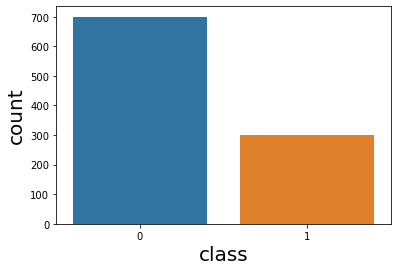

In [26]:
b = sns.countplot(x = 'class', data = df)
b.set_xlabel('class', fontsize = 20)
b.set_ylabel('count', fontsize = 20)

The plot above is really important, since it shows that our target, which is a binary classification, has more data of one of the classes. The amount of data of the '0' class is more than twice larger than the '1' class.

This can (or more certainly will) lead to our algorithms to present bias in their predictions. With this kind of difference in the class distribution, a stratified k-fold cross validation will not be of much use, since the bias will still be around.

**DISCLAIMER** The algorithms will still be implemented and I'll toy with the data regardless of the bias, which will be addressed at the end of this notebook.

**Using Pipelines, PCA and StandardScaler to better prepare the data**

**Pipelines** enable you to "pave a road" that you can use with every algorithm in a brief way.

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler #we will first scale our values bc there are big differences in magnitude
from sklearn.decomposition import PCA #It will reduce the dataset's dimensionality (i.e. : use less attributes)


In [28]:
pipe_dt = make_pipeline(StandardScaler(),
                       PCA(n_components = 8),
                       tree.DecisionTreeClassifier(max_depth = 3))

In [29]:
kfold = StratifiedKFold(n_splits = 10).split(X_train, y_train)

In [30]:
scores = []

In [31]:
for k, (train, test), in enumerate(kfold):
    pipe_dt.fit(X_train[train], y_train[train])
    score = pipe_dt.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
                                                     np.bincount(y_train[train]),
                                                     score))

Fold:  1, Class dist.: [441 189], Acc: 0.657
Fold:  2, Class dist.: [441 189], Acc: 0.786
Fold:  3, Class dist.: [441 189], Acc: 0.700
Fold:  4, Class dist.: [441 189], Acc: 0.771
Fold:  5, Class dist.: [441 189], Acc: 0.743
Fold:  6, Class dist.: [441 189], Acc: 0.729
Fold:  7, Class dist.: [441 189], Acc: 0.686
Fold:  8, Class dist.: [441 189], Acc: 0.686
Fold:  9, Class dist.: [441 189], Acc: 0.729
Fold: 10, Class dist.: [441 189], Acc: 0.714


In [32]:
print('\nCV accuracy: %.3f +/- %.3f' % 
     (np.mean(scores), np.std(scores)))


CV accuracy: 0.720 +/- 0.038


### Logistic Regression instead of Decision tree?

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
pipe_lr = make_pipeline(StandardScaler(),
                       PCA(n_components = 8),
                       LogisticRegression(random_state = 1))

In [35]:
kfold = StratifiedKFold(n_splits = 10).split(X_train, y_train)

In [36]:
scores_lr = []

In [37]:
for k, (train, test), in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores_lr.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
                                                     np.bincount(y_train[train]),
                                                     score))

Fold:  1, Class dist.: [441 189], Acc: 0.729
Fold:  2, Class dist.: [441 189], Acc: 0.800
Fold:  3, Class dist.: [441 189], Acc: 0.729
Fold:  4, Class dist.: [441 189], Acc: 0.800
Fold:  5, Class dist.: [441 189], Acc: 0.729
Fold:  6, Class dist.: [441 189], Acc: 0.714
Fold:  7, Class dist.: [441 189], Acc: 0.729
Fold:  8, Class dist.: [441 189], Acc: 0.743
Fold:  9, Class dist.: [441 189], Acc: 0.714
Fold: 10, Class dist.: [441 189], Acc: 0.757


In [38]:
print('\nCV accuracy: %.3f +/- %.3f' % 
     (np.mean(scores_lr), np.std(scores_lr)))


CV accuracy: 0.744 +/- 0.030


Slightly better accuracy with Logistic Regression than with the Decision Tre, making use of the same standard scaler and PCA algorithms.

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
import seaborn as sns

In [41]:
pipe_dt.fit(X_train, y_train)
y_pred_dt = pipe_dt.predict(X_test)
confmat_dt = confusion_matrix(y_true = y_test, y_pred = y_pred)
pd.DataFrame(confmat_dt)

,0,1
0,187,23
1,63,27


<AxesSubplot:>

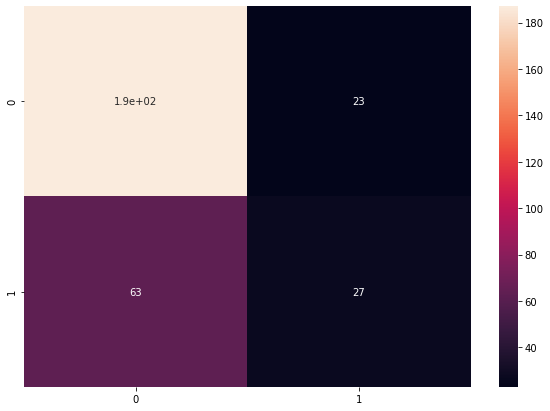

In [42]:
df_cm  = pd.DataFrame(confmat_dt, index = [i for i in "01"],
                     columns = [i for i in "01"])
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot = True)

However, when we look at the confusion matrix that our predictions generate, what was predicted when the distribution of the target class was graphed is now confirmed. The algorithms present a clear **bias towards classifying the instances as the '0' class**.

### Bagging for the TreeClassifier

Since we're here, lets try to implement a bagging algorithm to try to improve our results.

In [43]:
X, y = df.iloc[:, :-1].values, df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 0,
                                                   stratify = y)

In [44]:
dtree = tree.DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
len(X_train)

700

In [46]:
len(X_test)

300

In [47]:
tree.export_graphviz(dtree,
                     out_file = 'dot_data.dot',
                    feature_names = df.columns[:-1],
                     class_names = df.columns[-1],
                     special_characters = True                    
                    )

                   VarName  Importance
0          checking_status    0.137486
1                 duration    0.113978
2           credit_history    0.066720
3                  purpose    0.067508
4            credit_amount    0.168699
5           savings_status    0.029018
6               employment    0.066811
7   installment_commitment    0.019173
8          personal_status    0.018910
9            other_parties    0.038750
10         residence_since    0.031532
11      property_magnitude    0.068612
12                     age    0.089074
13     other_payment_plans    0.019397
14                 housing    0.013148
15        existing_credits    0.008246
16                     job    0.029249
17          num_dependents    0.009156
18           own_telephone    0.004535
19          foreign_worker    0.000000


<AxesSubplot:xlabel='VarName'>

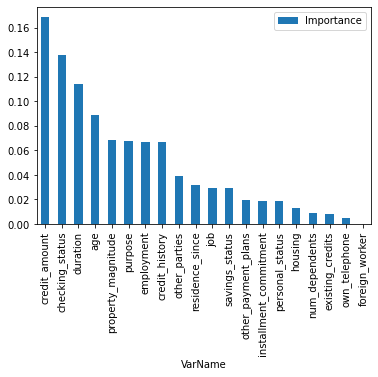

In [48]:
imp ={"VarName" : df.columns[0:-1],
     "Importance":dtree.feature_importances_}

print(pd.DataFrame(imp))

pd.DataFrame(imp).sort_values(by = "Importance", ascending = False).plot.bar(x = 'VarName')

In [49]:
print(error_rate(dtree, y_test, X_test))

0.31333333333333335


In [50]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

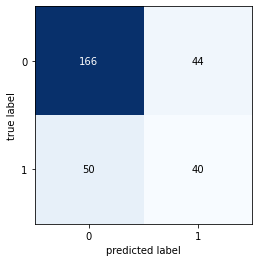

In [51]:
y_pred = dtree.predict(X_test)
fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred, binary = False))
plt.show()

In [52]:
from sklearn.ensemble import BaggingClassifier

In [53]:
#instantiation
baggingTree = BaggingClassifier(tree.DecisionTreeClassifier()
                                , n_estimators=20)
baggingTree

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20)

In [54]:
baggingTree.fit(X_train, y_train)

print(error_rate(baggingTree, y_test, X_test))

0.2733333333333333


Applying Bagging to our model has slightly improved its accuracy

In [55]:
#function - training / test for a given m - bagging approach
def train_test_bagging(m, X_train, y_train, X_test, y_test):
    """Calculates the error rate for a given set of data used in a bagging classifier and a given value of m number of estimators"""
    bag = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=m)
    bag.fit(X_train, y_train)
    return error_rate(bag, y_test, X_test)
#end train-test

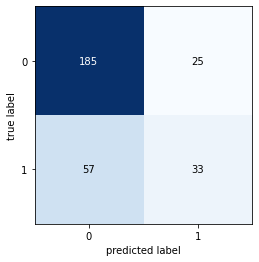

In [56]:
y_pred = baggingTree.predict(X_test)
fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix(y_test,
                                                           y_pred,
                                                           binary = False))
plt.show()

The bias of the model still stands. It is inherent to the data we have collected.

In [57]:
#values of m to evaluate
m_a_tester = [1,5,10,20,50,100,200]
result = np.zeros(shape=(1,7))
result

array([[0., 0., 0., 0., 0., 0., 0.]])

In [58]:
#repeat 20 times the experiment for each m
for expe in range(20):
    #evaluate each value of m
    res = [train_test_bagging(m ,X_train, y_train, X_test, y_test) for m in m_a_tester]
    res = np.asarray(res).reshape(1,7)
    #add a new row into the matrix
    result = np.append(result,res,axis=0)

result

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.35666667, 0.31333333, 0.24333333, 0.25666667, 0.23333333,
        0.23      , 0.21666667],
       [0.32333333, 0.26      , 0.24666667, 0.23      , 0.24      ,
        0.23      , 0.21      ],
       [0.33      , 0.28666667, 0.23666667, 0.20666667, 0.23333333,
        0.22333333, 0.21333333],
       [0.33333333, 0.28333333, 0.23      , 0.21666667, 0.22333333,
        0.24666667, 0.21666667],
       [0.32333333, 0.31      , 0.22666667, 0.26666667, 0.22      ,
        0.20666667, 0.23333333],
       [0.35      , 0.3       , 0.25333333, 0.26333333, 0.21666667,
        0.23666667, 0.23666667],
       [0.29666667, 0.27      , 0.23666667, 0.23666667, 0.22333333,
        0.22      , 0.22      ],
       [0.35666667, 0.23333333, 0.24666667, 0.24      , 0.22666667,
        0.22333333, 0.22666667],
       [0.37333333, 0.26333333, 0.23666667, 0.21333333, 0.22      ,
        0.23666667, 0.2

In [59]:
#remove the first row
result = np.delete(result,0,axis=0)
#calculate the mean
mresult = np.mean(result,axis=0)
mresult

array([0.33916667, 0.28066667, 0.247     , 0.23716667, 0.22916667,
       0.22416667, 0.21966667])

[<matplotlib.lines.Line2D at 0x1f505ad15c8>]

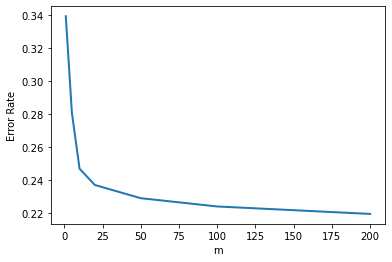

In [60]:
#label of the axes
plt.xlabel("m")
plt.ylabel("Error Rate")

plt.plot(m_a_tester,mresult,linewidth=2)

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# the parameters to make vary
# the name of the parameter must be explicit
# we enumerate the values to try
parametres = [{"n_estimators":[1,5,10,20,50,100,200]}]

#instantiate the classifier
bag = BaggingClassifier(tree.DecisionTreeClassifier())

#instantiation of the gris search tool
#the metric used is the accuracy rate (error rate = 1 - accuracy rate)
grid_bag = GridSearchCV(estimator=bag, param_grid=parametres, scoring="accuracy")

#launching the exploration
grille_bag = grid_bag.fit(X_train,y_train)

In [63]:
grille_bag.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [64]:
grille_bag.best_params_

{'n_estimators': 10}

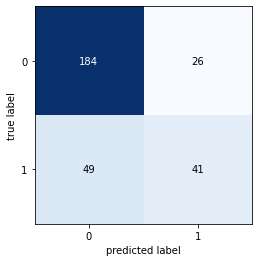

In [65]:
y_pred = grille_bag.predict(X_test)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred, binary = False))
plt.show()

In [66]:
baggingTree_best = BaggingClassifier(tree.DecisionTreeClassifier(),
                                    n_estimators = 20
                                    )
baggingTree

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20)

In [67]:
baggingTree.fit(X_train, y_train)

print("accuracy:",1 -error_rate(baggingTree, y_test, X_test))

accuracy: 0.7733333333333333


In [68]:
print("accuracy:",1 -error_rate(grille_bag,y_test,X_test))

accuracy: 0.75


Choosing the best parameters for the model increased its accuracy by 1%. Better than nothing!

## Explain yourself, model

If we imagine that we implement any of these implementations in a real job, it is not crazy to think that a client who's been rejected wants to ask us the reasons why he cannot access to a bank credit. This section aims to open the black box of the algorithms implemented.

**How?** Via Shap values. In order to not replace a black box for another, and  keeping it brief... Shap values (SHapley Additive exPlanations) answer the "how much did each one contribute?" question.

Still keeping it short, it will construct **N!** iterations of the model and calculate the average difference that each feature makes in the model. The following link provides an explanation on Shap values than might be helpful in case you wish to dive in a little bit deeper.

https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30

In [69]:
shap.initjs() #To make the visualizations available

The first 3 shap plots are images, since these representations did not work on GitHub, the code is left in the notebook.

In [70]:
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [73]:
df_display = pd.read_csv('../dataset_31_credit-g.csv')
X_display, y_display = df_display.iloc[:, :-1], df_display.iloc[:,-1]

In [74]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_display.iloc[0,:])

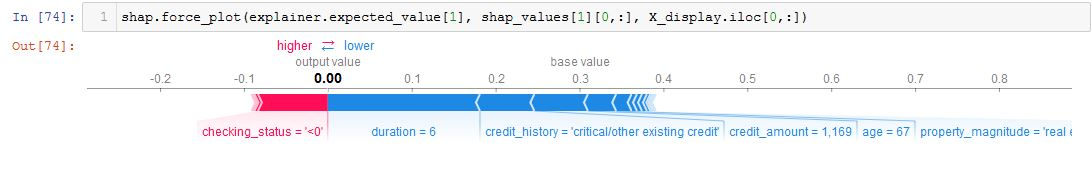

If we take the plot above, rotate it 90 degrees and plot many more combinations of the data's attributes, we obtain the following.

In [75]:
shap.force_plot(explainer.expected_value[1], 
                shap_values[1][:1000,:], 
                X_display.iloc[:1000,:])

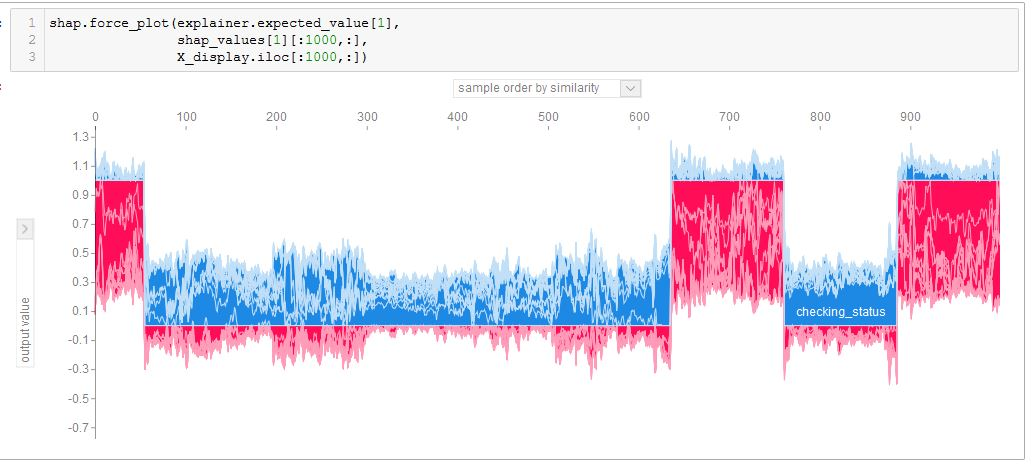

Something interesting that can be noticed in the previous shap plot is that the shap values change dramatically for the test data. Since we do not work with that data for training the algorithm, I'll plot just the training data to see if better insights are hidden there.

In [76]:
shap.force_plot(explainer.expected_value[1], 
                shap_values[1][:700,:], 
                X_display.iloc[:700,:])

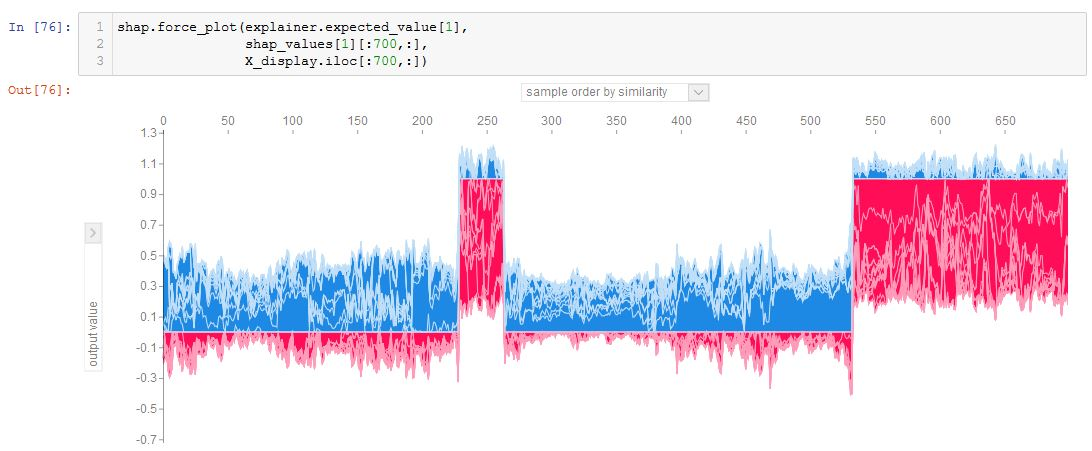

We find the same dramatic changes within the testing data. On the one hand, this implies that our attributes can either add or substract from their importance on the model. On the other hand, however, even if it implies a positive or a negative correlation, the important features will remain the same, as we will see in the next graphs.

In [77]:
np.array(shap_values);

In [78]:
np.array(shap_values).shape

(2, 1000, 20)

In [79]:
X.shape

(1000, 20)

We must obtain two arrays of equal shape

In [80]:
np.reshape(np.array(shap_values)[0:1,:,:], X.shape);

Since he parameters of the shap function have to be of the same size, the shap values matrix can be converted into a numpy array, much more malleable. Right after, we can use the *np.reshape()* with the following syntax:

**np.reshape(data_to_modify, desired_size)**

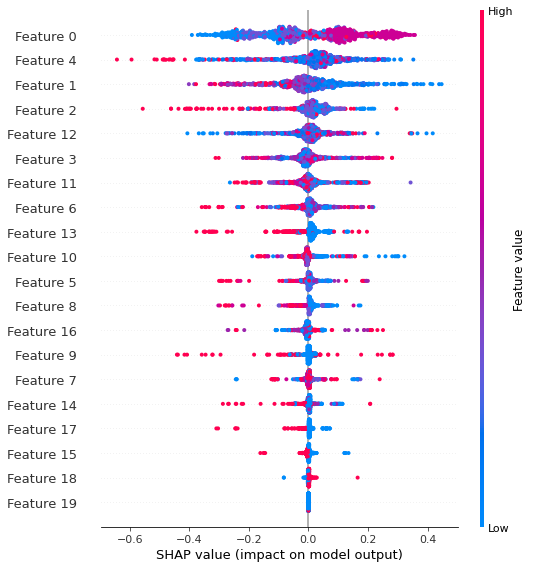

In [81]:
shap.summary_plot(np.reshape(np.array(shap_values)[0:1,:,:],
                             X.shape), X)

The plot above respresents:

- **Feature Importance** in descending order, as it is stated in the right legend. From high importance (red) to low importance (blue)
- **Impact on model**: represented by the horizontal axis
- **Correlation**: Here represented by the color, red meaning that in that iteration, the feature had a positive correlation with the output, while blue means it had a negative correlation.

Any NaN values that the dataset might have would be coloured gray in the shap plot

Lets look at a plot that indicates a "summary" of the kind of impact of each feature.

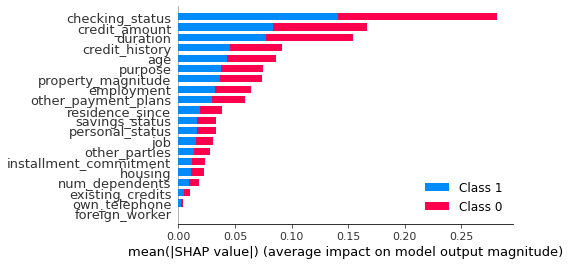

In [82]:
shap.summary_plot(shap_values, X_display, plot_size = None, plot_type = 'bar')

From what can be seen in the plot above, the insight that can be drawn from it is that the correlation that each feature has is... a mix of positive and negative? It even looks like it is exactly 50% positive and 50% negative. At the very least, this plot seems to confirm the 'feature importance' plot that we visualized earlier, with slight changes in the most importance feature's order.

If we take a look at the first shap plot, the *force_plot()* 

# Conclusions from what we've seen so far

So far, the best accuracy was achieved via the Bagging Decision Tree, which achieved a **76% of accuracy**.

In [83]:
print('\nDecision Tree CV accuracy: %.3f +/- %.3f' % 
     (np.mean(scores), np.std(scores)))


Decision Tree CV accuracy: 0.720 +/- 0.038


In [84]:
print('\nLogistic Regression CV accuracy: %.3f +/- %.3f' % 
     (np.mean(scores_lr), np.std(scores_lr)))


Logistic Regression CV accuracy: 0.744 +/- 0.030


In [85]:
print("Bagging Tree Accuracy:",round(1 -error_rate(grille_bag,y_test,X_test), 2))

Bagging Tree Accuracy: 0.75


### Whata could've gone better? 

The main restrain comes from data, where the target class is imbalanced, which causes the algorithms to present bias. In the next notebook, I'll deal with the lack of balance within the target values

## How can we solve the imbalanced data problem?

One solution is to implement a **Random Forest** algorithm, which usually has a good performance on imbalanced data.

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [87]:
rfc = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

In [88]:
rfc_pred = rfc.predict(X_test)

Instead of using the accuracy score we can use other metrics:

- f1_score: Weighted average of precision and recall
- Recall/Sensitivity: number of true positives divided by the number of positive values in test data. A low recall indicates a high number of false negatives.

In [89]:
def scores(y_test, y_pred):
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print("f1 score:", f1_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    out_dict = {'Accuracy':accuracy_score(y_test, y_pred),
               'f1 score':f1_score(y_test, y_pred),
               'Recall:':recall_score(y_test, y_pred)}
    return(out_dict)

In [90]:
scores(y_test, rfc_pred)

Accuracy: 0.73
f1 score: 0.4
Recall: 0.3


{'Accuracy': 0.73, 'f1 score': 0.4, 'Recall:': 0.3}

Both indicators are lower than the accuracy, pointing at the imbalanced data problem. What we are going to do is to **generate synthetic samples** by using SMOTE (Synthetic Minority Oversampling Technique).

In [91]:
from imblearn.over_sampling import SMOTE

We set again the X and y sets and split them into training and testing data. The reason behind it is that it is best to make sure that new samples are generated only in the training data, to be able to later evaluate how our model predicts unseen data.

In [92]:
#We set the X and y variables from the dataset's values
X, y = df.iloc[:, :-1].values, df.iloc[:,-1].values

#Set from the previous variables the train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 0,
                                                   stratify = y)

In [93]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

# Logistic Regression

In [94]:
#We generate a dictionary to save the scores and plot them later. We'll add dictionaries via the scores() function 
# defined above
dict_scores = {}

In [95]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [96]:
smote_pred = smote.predict(X_test)

In [97]:
dict_scores['Logistic Regression'] = scores(y_test, smote_pred)

Accuracy: 0.7266666666666667
f1 score: 0.6057692307692307
Recall: 0.7


This approach has been useful to improve our algorithm's performance.

# With decision tree?

In [98]:
smote_dt = tree.DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)

In [99]:
smote_pred_dt = smote_dt.predict(X_test)

In [100]:
dict_scores['Decision Tree']=scores(y_test, smote_pred_dt)

Accuracy: 0.7166666666666667
f1 score: 0.5728643216080402
Recall: 0.6333333333333333


Appearently, after generating synthetic samples, the Logistic Regression outperforms the decision tree.

# With a lot of decision trees? aka Random Forest

In [101]:
smote_rfc = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

In [102]:
smote_pred_rfc = smote_rfc.predict(X_test)

In [103]:
dict_scores['Random Forest']=scores(y_test, smote_pred_rfc)

Accuracy: 0.76
f1 score: 0.5955056179775282
Recall: 0.5888888888888889


# Bagging Classifier

In [104]:
from imblearn.ensemble import BalancedBaggingClassifier as BBC

In [105]:
balbac = BBC(baggingTree)

In [106]:
balbac.fit(X_train, y_train)

BalancedBaggingClassifier(base_estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                           n_estimators=20))

In [107]:
y_pred_bbc = balbac.predict(X_test)

In [108]:
dict_scores['Bagging Classifier']=scores(y_test, y_pred_bbc)

Accuracy: 0.74
f1 score: 0.5851063829787235
Recall: 0.6111111111111112


# AdaBoost Classifier

In [109]:
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier as EEC
from imblearn.ensemble import RUSBoostClassifier as RUS

In [110]:
base_estimator = AdaBoostClassifier(n_estimators = 20)
eec = EEC(n_estimators=20,
         base_estimator = base_estimator,
         n_jobs = -1)

In [111]:
eec.fit(X_train, y_train)

EasyEnsembleClassifier(base_estimator=AdaBoostClassifier(n_estimators=20),
                       n_estimators=20, n_jobs=-1)

In [112]:
y_pred_eec = eec.predict(X_test)

In [113]:
dict_scores['AdaBoost Classifier']=scores(y_test, y_pred_eec)

Accuracy: 0.7133333333333334
f1 score: 0.5612244897959183
Recall: 0.6111111111111112


Lets try another adapted implementation of a Boosting Classifier for an oversampled data.

In [114]:
rusboost = RUS(n_estimators = 20,
              base_estimator = base_estimator)

In [115]:
rusboost.fit(X_train, y_train)

RUSBoostClassifier(base_estimator=AdaBoostClassifier(n_estimators=20),
                   n_estimators=20)

In [116]:
y_pred_rus = rusboost.predict(X_test)

In [123]:
dict_scores['RusBoost Classifier']=scores(y_test, y_pred_rus)

Accuracy: 0.7333333333333333
f1 score: 0.5876288659793815
Recall: 0.6333333333333333


# Final Conclusions

At this point the imbalance in the data has been addressed and the algorithm to make predictions can be chosen quite firmly. The winner of our heart, so far, is the **AdaBoost Classifier.**

In [124]:
df_scores = pd.DataFrame(dict_scores).transpose()

In [125]:
df_scores = df_scores.round(2)

In [126]:
df_scores

,Accuracy,f1 score,Recall:
Logistic Regression,0.73,0.61,0.70
Decision Tree,0.72,0.57,0.63
Random Forest,0.76,0.60,0.59
Bagging Classifier,0.74,0.59,0.61
AdaBoost Classifier,0.71,0.56,0.61
RusBoost Classifier,0.73,0.59,0.63


FixedFormatter should only be used together with FixedLocator


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, 'RusBoost Classifier'),
  Text(0.0, 0, 'Logistic Regression'),
  Text(1.0, 0, 'Decision Tree'),
  Text(2.0, 0, 'Random Forest'),
  Text(3.0, 0, 'Bagging Classifier'),
  Text(4.0, 0, 'AdaBoost Classifier'),
  Text(5.0, 0, 'RusBoost Classifier'),
  Text(6.0, 0, '')])

<Figure size 1440x360 with 0 Axes>

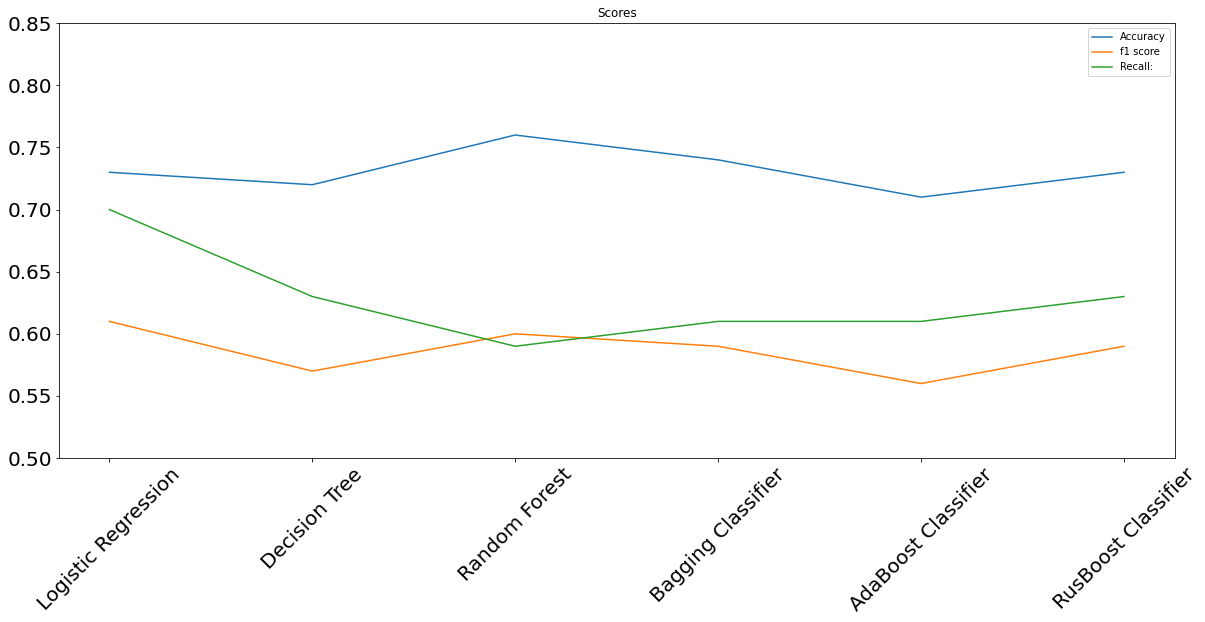

In [127]:
plt.figure(figsize=(20,5))
df_scores.plot(kind = 'line', figsize = (20,8), fontsize = 20,
              title = 'Scores', ylim = (0.50, 0.85))
plt.xticks(rotation = 45)

Based on this plot, we can see that the metric that is less stable along the different models is the *Recall*, or *Sensitivity*, metric. However, lets use a different visualization and see if there is any insight that we can derive from it more easily.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Bagging Classifier'),
  Text(4, 0, 'AdaBoost Classifier'),
  Text(5, 0, 'RusBoost Classifier')])

<Figure size 1440x360 with 0 Axes>

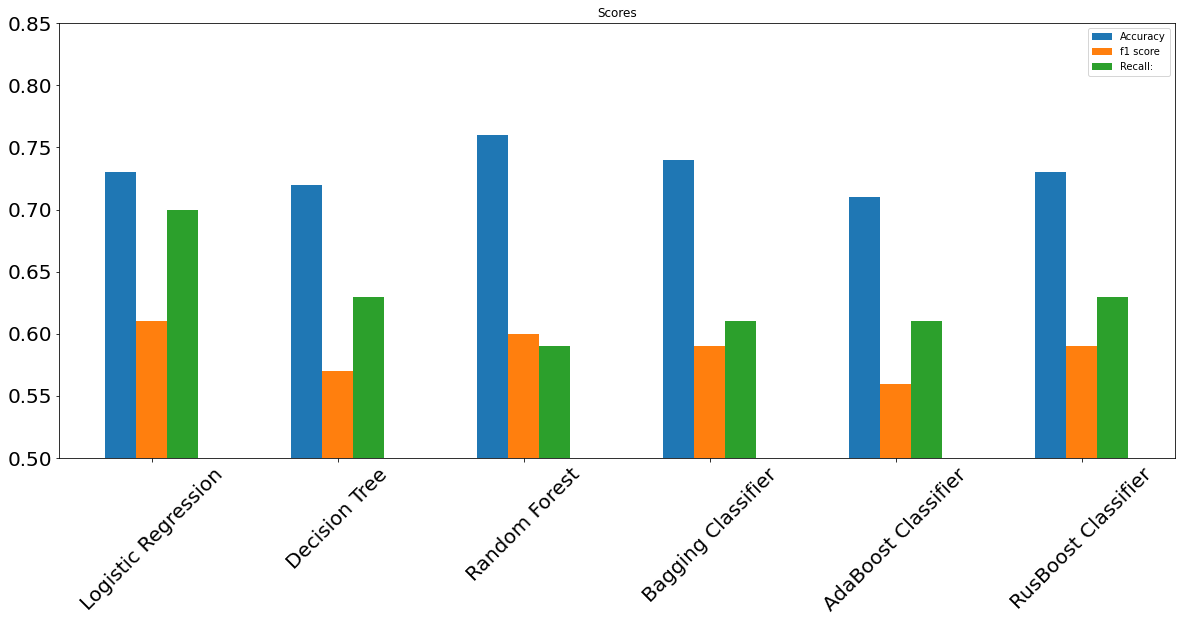

In [128]:
#We use a Bar chart
plt.figure(figsize=(20,5))
df_scores.plot(kind = 'bar', figsize = (20,8), fontsize = 20,
              title = 'Scores', ylim = (0.50, 0.85))
plt.xticks(rotation = 45)

I consider the best model to be the *AdaBoost Classifier*, which provides not only the best *Recall*, but also performs well with the other two scores, given the average performance of the models.

**WINNER:** LOGISTIC REGRESSION